In [1]:
# from sklearn.linear_model import LinearRegression
# re = LinearRegression()
# x=[[1],[2],[3],[4],[5],[6]]
# y=[2,2.5,4.5,3,5,4.7]
# re.fit(x,y)
# re.predict([[8.5]])

array([6.40238095])

##
SIMPLE LINEAR REGRESSION

##
example 1 
where area and price is give-only one independent vari

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
house = {'area':[2500,3000,3200,3600,4000],
'price': [550000,565000,610000,680000,725000]
}

In [4]:
df = pd.DataFrame(house)

In [5]:
df

,area,price
0,2500,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


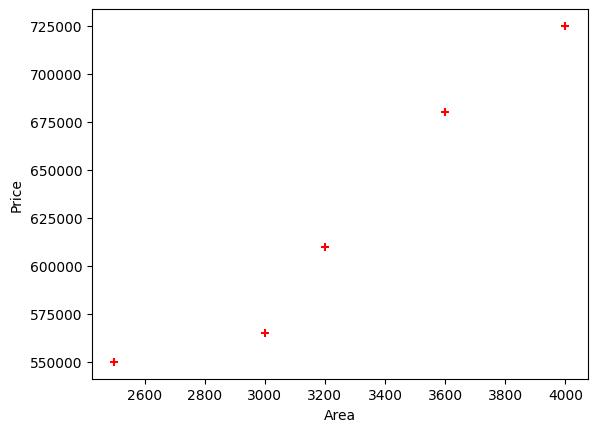

In [6]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:
new_df = df.drop('price',axis=1)
new_df

,area
0,2500
1,3000
2,3200
3,3600
4,4000


In [8]:
model = linear_model.LinearRegression()
model.fit(new_df,df.price)

# here linera_model is the package and Linear Reression is the class and we are creating am instance of ti and storign it in a aobj called model
# fit means we are training our model where we gaev our new_df and df.price

LinearRegression()

In [9]:
model.predict([[5000]])
# the value shoudl be in 2d

/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([846417.68292683])

In [10]:
model.coef_

# this is to find the slope

array([126.67682927])

In [11]:
model.intercept_

# to find the intercept

213033.53658536595

In [12]:
# y=m*x + b - mean squre error
# m = coef/slope
# b = intercept
# price = m * area + b
126.67682927 * 5000 + 213033.53658536595

846417.6829353659

In [13]:
area={'area':[1000,9000,3300,5000,5555,1800,7000,8880,3700]}
area_df = pd.DataFrame(area)
area_df

,area
0,1000
1,9000
2,3300
3,5000
4,5555
5,1800
6,7000
7,8880
8,3700


In [14]:
p = model.predict(area_df)
p

array([ 339710.36585366, 1353125.        ,  631067.07317073,
        846417.68292683,  916723.32317073,  441051.82926829,
       1099771.34146341, 1337923.7804878 ,  681737.80487805])

In [15]:
area_df['Price'] = p
area_df

,area,Price
0,1000,3.397104e+05
1,9000,1.353125e+06
2,3300,6.310671e+05
3,5000,8.464177e+05
4,5555,9.167233e+05
5,1800,4.410518e+05
6,7000,1.099771e+06
7,8880,1.337924e+06
8,3700,6.817378e+05


In [16]:
area_df.to_csv('Area_prediction.csv')

##
examnple 2
income per yaer

In [1]:
cap_df = pd.read_csv('canada_per_capita_income.csv')
cap_df

NameError: name 'pd' is not defined

In [18]:
year_df = cap_df.drop('per capita income (US$)',axis=1)
year_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [19]:

model_year = linear_model.LinearRegression()
model_year.fit(year_df,cap_df['per capita income (US$)'])


LinearRegression()

In [20]:
model_year.predict([[2020]])

/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

##
MULTIPLE LR

Multiple linear regression involves more than one independent variable

In [21]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Data Preprocessing: Fill NA values with median value of a column



In [22]:
df.bedrooms.median()
# df['bedrooms'].median()

4.0

In [23]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [24]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)


# here without creating new df we directly droped it in the fit parameter

LinearRegression()

In [25]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [26]:
reg.intercept_

221323.00186540402

##
Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old



In [28]:
reg.predict([[3000,3,40]])

/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [29]:
# y=m1*x1 + m2*x2 + m3*x3 + b - mean squre error
# m = coef/slope
# b = intercept
# price = m1 * area + m2 * bedrooms + m3 * age + b

# price is dependent vari
# area,bed room,age are inde vari(features)
# m1,m2,m3 are the coefficinrts


# In the equation you provided, y = m1x1 + m2x2 + m3*x3 + b, you have three coefficients (m1, m2, m3) and one intercept (b). This equation represents a multiple linear regression model with three independent variables (x1, x2, x3) and a dependent variable (y).

112.06244194 * 3000 + 23388.88007794 * 3 + (-3231.71790863) * 40 + 221323.00186540402


498408.25157402403

In [ ]:
d = pd.read_csv("hiring.csv")
d

In [ ]:
d.experience = d.experience.fillna('zero')
d

In [ ]:
# d.experience = d.experience.apply(w2n.word_to_num)
# d

# OR

number_mapping = {'zero': 0 ,'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,'seven': 7,'ten': 10,'eleven': 11}
d.experience = d.experience.map(number_mapping)
d

In [ ]:
a = d['test_score(out of 10)'].mean()
b = int(a)
b

In [ ]:
d['test_score(out of 10)']=d['test_score(out of 10)'].fillna(b)

In [ ]:
d

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

In [ ]:
reg.predict([[2,9,6]])


In [ ]:
# reg.score()